In [220]:
from scipy import *


# вычисление средней
m = mean( [1,2,3,4,5] )
print("mean = ",m)
# m = 3


# вычисление медианы
med = median( [1,1,1,1,5] )
print("me = ",med)


# стандартное отклонение
sd = std( [1,2,3,4,5] )
print("st = ", sd)


# квартили
q1 = percentile( [1,2,3,4,5], 25 )
q2 = percentile( [1,2,3,4,5], 50 )
q3 = percentile( [1,2,3,4,5], 75 )
print("q1 = ",q1)
print("q2 = ",q2)
print("q3 = ",q3)

mean =  3.0
me =  1.0
st =  1.4142135623730951
q1 =  2.0
q2 =  3.0
q3 =  4.0


In [221]:
import scipy.stats

# создание случаных значений (равномерное распределение)
# от -100 до 100 (-100+200)
# 100 - количество
U1 = scipy.stats.uniform.rvs(-100, 200, size=1000)


print("mean = ", mean(U1))
print("std = ", std(U1))

mean =  -1.8704683538699423
std =  56.69049249978125


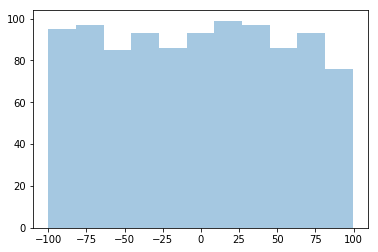

In [228]:
# графики
from matplotlib.pyplot import *
import seaborn as sns

# гистограмма
sns.distplot(U1, kde = False)
show()

# в идеале должна получится ровная гистограмма
# однако такое возмодно только в пределе, 
# когда число значений стремится к безсконечности,
# а в примере их всего 1000